In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
tweet = pd.read_csv("E:\\dataset\\sentiment_tweets3.csv")
tweet.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [3]:
tweet.rename(columns={'label (depression result)' : 'depression'},inplace=True)
tweet.rename(columns={'message to examine' : 'text'},inplace=True)
tweet.rename(columns={tweet.columns[0]: 'ID'}, inplace=True)
tweet.head()

,ID,text,depression
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [4]:
count = tweet['depression'].value_counts()
count

0    8000
1    2314
Name: depression, dtype: int64

([<matplotlib.patches.Wedge at 0x27f725240d0>,
 [Text(-0.8378919432981893, 0.7126970544038921, 'depression : no'),
  Text(0.8378920100256991, -0.712696975954784, 'depression:yes')],
 [Text(-0.45703196907173954, 0.3887438478566684, '77.6%'),
  Text(0.4570320054685631, -0.3887438050662458, '22.4%')])

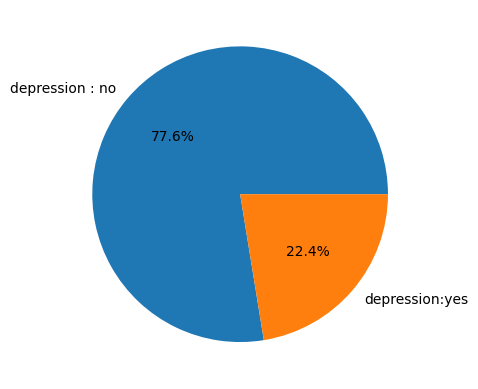

In [5]:
#depression count : 

count = tweet['depression'].value_counts()
count

# autopct = '%1.1f%%' - shows the percentage of the data in the pie chart 

plt.pie(count,labels = ['depression : no','depression:yes'],autopct = '%1.1f%%')

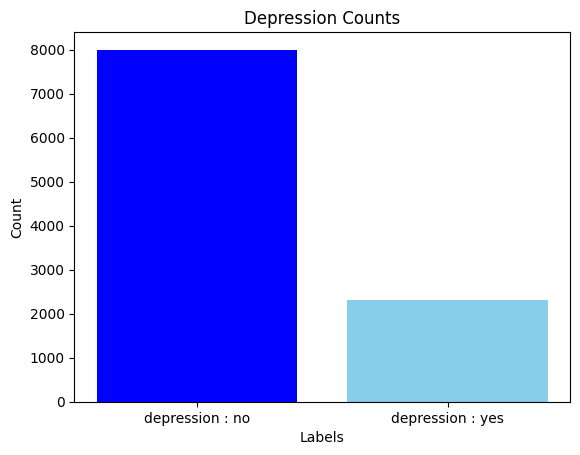

In [6]:
#bar plot comparing the no and yes of the depreession : 

labels = ['depression : no', 'depression : yes']
plt.bar(labels, count , color = ['Blue','skyblue'])

plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Depression Counts')

plt.show()

In [7]:
#taking the text values for nltk process : 
count2 = tweet['text'][12]
count2

'kisha they cnt get over u til they get out frm under u just remember ur on top '

In [8]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
tokens = nltk.word_tokenize(count2)
tokens
print("Original Text:", count2)
print("Tokens:", tokens)

Original Text: kisha they cnt get over u til they get out frm under u just remember ur on top 
Tokens: ['kisha', 'they', 'cnt', 'get', 'over', 'u', 'til', 'they', 'get', 'out', 'frm', 'under', 'u', 'just', 'remember', 'ur', 'on', 'top']


In [10]:
import wordcloud
from wordcloud import WordCloud,STOPWORDS
from tqdm.notebook import tqdm

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
sent = SentimentIntensityAnalyzer()


polarity_scores = []
for index, row in tweet.iterrows():
    text = row['text']
    polarity = sent.polarity_scores(text)
    polarity_scores.append(polarity)

vad = pd.DataFrame(polarity_scores)
result = pd.concat([tweet, vad], axis=1)
result

,ID,text,depression,neg,neu,pos,compound
0,106,just had a real good moment. i missssssssss hi...,0,0.000,0.734,0.266,0.4404
1,217,is reading manga http://plurk.com/p/mzp1e,0,0.000,1.000,0.000,0.0000
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,0.000,1.000,0.000,0.0000
3,288,@lapcat Need to send 'em to my accountant tomo...,0,0.000,0.873,0.127,0.4404
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,0.344,0.656,0.000,-0.8126
10310,802310,What do you do when depression succumbs the br...,1,0.167,0.721,0.113,-0.2960
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,0.469,0.400,0.131,-0.7845
10312,802312,dont mistake a bad day with depression! everyo...,1,0.244,0.396,0.361,0.1950


In [12]:
result.rename(columns={'compound' : 'polarity'},inplace=True)

In [13]:
result['polarity']== 1  # positive comments

0        False
1        False
2        False
3        False
4        False
         ...  
10309    False
10310    False
10311    False
10312    False
10313    False
Name: polarity, Length: 10314, dtype: bool

In [14]:
result['polarity']== -1 # negative comments

0        False
1        False
2        False
3        False
4        False
         ...  
10309    False
10310    False
10311    False
10312    False
10313    False
Name: polarity, Length: 10314, dtype: bool

In [15]:
neg = result[result['polarity'] < 0]
neg

,ID,text,depression,neg,neu,pos,polarity
16,1899,"@rokchic28 no probs, I sell nothing other than...",0,0.104,0.896,0.000,-0.2960
20,2126,haven't been able to sleep at ALL. i think i'l...,0,0.216,0.784,0.000,-0.5106
50,4895,@EmmaLight I'd forgotten about that We need t...,0,0.147,0.853,0.000,-0.2263
52,5561,Tired today - drunk husband to be rolled in at...,0,0.299,0.574,0.127,-0.4926
53,5638,@ingorammer well it is definitelly worth tryin...,0,0.159,0.692,0.148,-0.3004
...,...,...,...,...,...,...,...
10307,802307,@GaindaSwamy @Kanatungaa @Being_Humor @theskin...,1,0.296,0.704,0.000,-0.9042
10308,802308,Many sufferers of depression aren't sad; they ...,1,0.459,0.439,0.102,-0.8379
10309,802309,No Depression by G Herbo is my mood from now o...,1,0.344,0.656,0.000,-0.8126
10310,802310,What do you do when depression succumbs the br...,1,0.167,0.721,0.113,-0.2960


In [16]:
post =result[result['polarity']>0]
post

,ID,text,depression,neg,neu,pos,polarity
0,106,just had a real good moment. i missssssssss hi...,0,0.000,0.734,0.266,0.4404
3,288,@lapcat Need to send 'em to my accountant tomo...,0,0.000,0.873,0.127,0.4404
5,624,so sleepy. good times tonight though,0,0.000,0.611,0.389,0.4902
7,808,23 or 24ï¿½C possible today. Nice,0,0.000,0.641,0.359,0.4215
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0,0.000,0.455,0.545,0.7177
...,...,...,...,...,...,...,...
10300,802300,"depression: i'm always here for u, darling",1,0.296,0.400,0.304,0.0258
10301,802301,"I'm suffering from depression, I'm thankful th...",1,0.165,0.617,0.218,0.4927
10303,802303,IM GOING TO SEE @HayleyKiyoko NEXT WEEK IN CHI...,1,0.068,0.593,0.339,0.9663
10305,802305,RT Depression Could Be Improved With Vitamin D...,1,0.168,0.591,0.241,0.1531


In [17]:
neg['text']

16       @rokchic28 no probs, I sell nothing other than...
20       haven't been able to sleep at ALL. i think i'l...
50       @EmmaLight I'd forgotten about that  We need t...
52       Tired today - drunk husband to be rolled in at...
53       @ingorammer well it is definitelly worth tryin...
                               ...                        
10307    @GaindaSwamy @Kanatungaa @Being_Humor @theskin...
10308    Many sufferers of depression aren't sad; they ...
10309    No Depression by G Herbo is my mood from now o...
10310    What do you do when depression succumbs the br...
10311    Ketamine Nasal Spray Shows Promise Against Dep...
Name: text, Length: 2541, dtype: object

In [18]:
post['text']

0        just had a real good moment. i missssssssss hi...
3        @lapcat Need to send 'em to my accountant tomo...
5                    so sleepy. good times tonight though 
7                       23 or 24ï¿½C possible today. Nice 
9          @daNanner Night, darlin'!  Sweet dreams to you 
                               ...                        
10300           depression: i'm always here for u, darling
10301    I'm suffering from depression, I'm thankful th...
10303    IM GOING TO SEE @HayleyKiyoko NEXT WEEK IN CHI...
10305    RT Depression Could Be Improved With Vitamin D...
10312    dont mistake a bad day with depression! everyo...
Name: text, Length: 5456, dtype: object

(-0.5, 399.5, 199.5, -0.5)

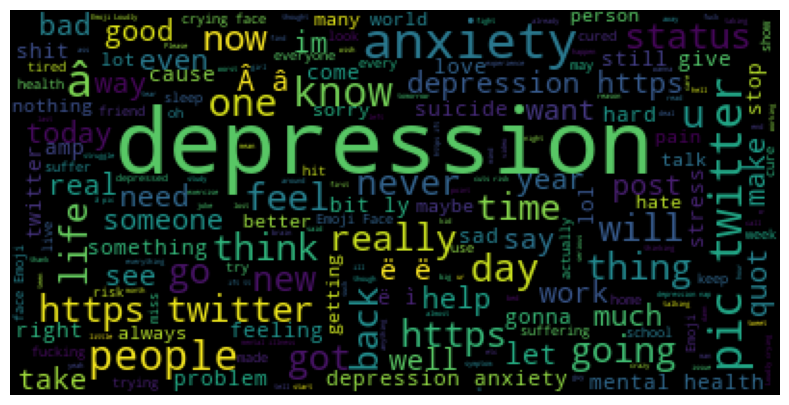

In [19]:
total_neg = " ".join(neg['text'])
total_neg[0:100]
wordcloud_negative = WordCloud(stopwords = set(STOPWORDS)).generate(total_neg)
plt.figure(figsize = (15,5))
plt.imshow(wordcloud_negative)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

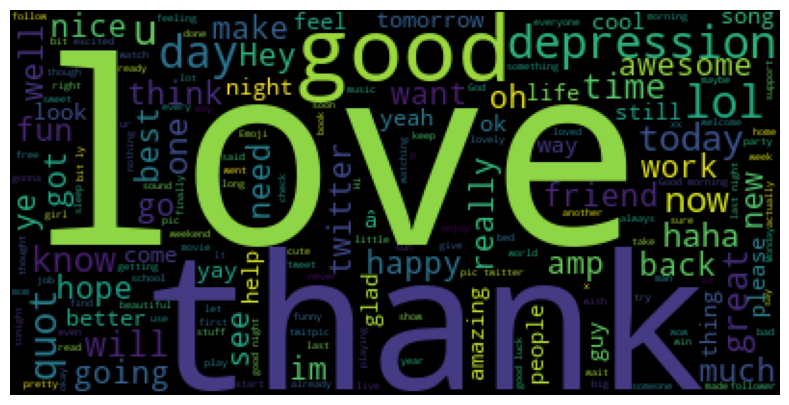

In [20]:
total_post = " ".join(post['text'])
total_post[0:100]
wordcloud_positive = WordCloud(stopwords = set(STOPWORDS)).generate(total_post)
plt.figure(figsize = (15,5))
plt.imshow(wordcloud_positive)
plt.axis('off')